Index(['sky', 'airtemp', 'humidity', 'wind', 'water', 'forcast', 'enjoysport'], dtype='object')


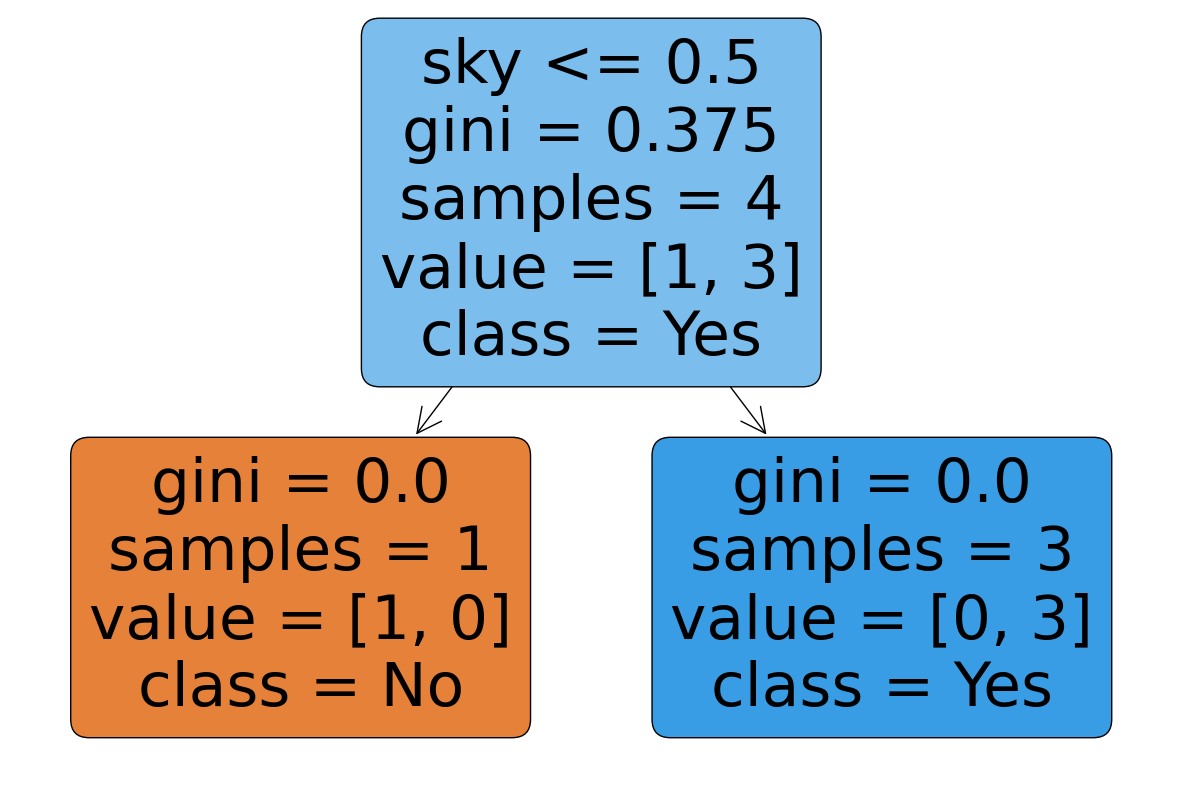

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def load_ds():
    data =pd.read_csv('/content/enjoysports.csv')
    print(data.columns)
    return data

def preprocess_data(data):
    """Performing label encoding nd preprocessing."""
    le =LabelEncoder()
    for column in data.columns:
        if data[column].dtype =='object':
            data[column] =le.fit_transform(data[column])
    return data

def create_d_tree(data):
    if 'enjoysport' not in data.columns:
        print(f"Available columns: {data.columns}")
        raise ValueError(f"Column 'enjoysport' not found in DataFrame.Available columns: {data.columns}")
    X =data.drop('enjoysport',axis=1)
    y = data['enjoysport']
    clf =DecisionTreeClassifier()
    clf.fit(X, y)
    return clf

def visualize_d_tree(clf, X):
    """Visualizes tree."""
    plt.figure(figsize=(15,10))
    plot_tree(clf,filled=True,rounded=True,feature_names=X.columns,class_names=['No','Yes'])
    plt.show()


data =load_ds()
data =preprocess_data(data)
clf =create_d_tree(data)
visualize_d_tree(clf, data.drop('enjoysport',axis=1))